### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
sns.set(color_codes=True)

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [5]:
rating = pd.read_csv('Data.csv')
movie = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [7]:
print(rating.info())
print(rating.shape)
print(rating.describe())
print(rating.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
(100000, 4)
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08
user id      0
movie id   

In [6]:
print(movie.info())
print(movie.shape)
print(movie.describe())
print(movie.isna().sum())
print(movie.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [8]:
print(user.info())
print(user.shape)
print(user.describe())
print(user.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
(943, 5)
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [31]:
movie.iloc[:,3:22].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [43]:
# determining movies with 'unknown' genre 
movie[movie['unknown'] == 1]
# Index 1371 Movie Id: 1373, Movie Title: Good Morning has an unknown genre 
# Dropping movies with unknown genre 
movie.drop(movie[movie['unknown'] == 1].index, axis = 0, inplace = True)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [321]:
# Creating a dataframe without 'movie id' column
movie_noid = movie.iloc[:, 1:]
# Determining the number of genres for each movie 
movie_noid['number of genres'] = movie_noid.sum(axis = 1)

In [118]:
# Displaying the movie title and number of genres for the movie
movie_noid[['movie title','number of genres']]

,movie title,number of genres
0,Toy Story,3
1,GoldenEye,3
2,Four Rooms,1
3,Get Shorty,3
4,Copycat,3
...,...,...
1676,Mat' i syn,1
1677,B. Monkey,2
1678,Sliding Doors,2
1679,You So Crazy,1


In [120]:
print("Total number of movies which have more than one genres: " + str(len(movie_noid[movie_noid['number of genres'] > 1])))

Total number of movies which have more than one genres: 849


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [18]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


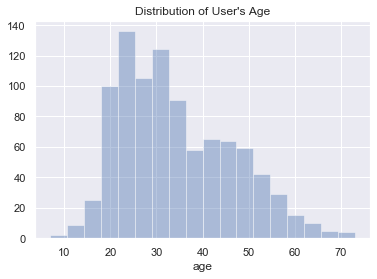

In [9]:
# Univariate plot for "Age"
ax = sns.distplot(user['age'], kde = False)
ax.set_title("Distribution of User's Age")
plt.show()

In [12]:
# Extracting year from release date 
movie['release year'] = pd.DatetimeIndex(movie['release date']).year

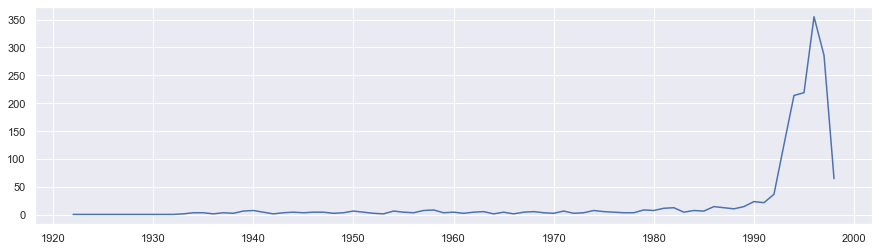

In [13]:
# Univariate for "release year"
plt.figure(figsize=(15,4))
plt.plot(movie['release year'].value_counts().sort_index())
plt.show()

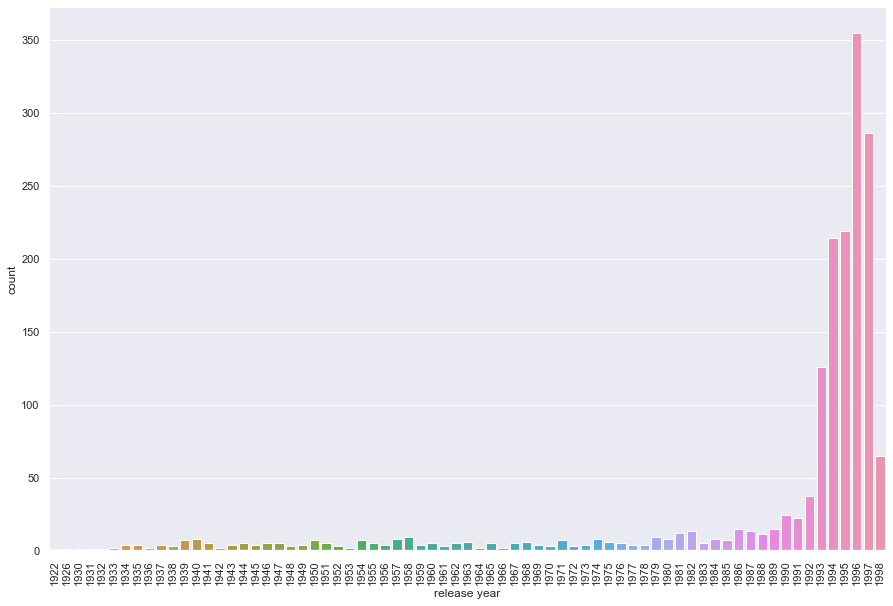

In [14]:
# Univariate plot for "release year"
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
sns.countplot(movie['release year'])
plt.show()

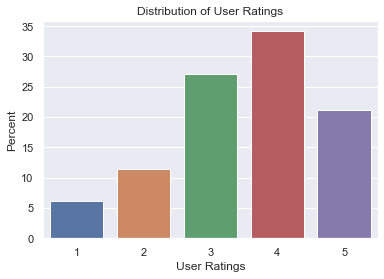

In [15]:
# Percentage of User Ratings
ax = sns.barplot(x= 'rating', y='rating' , data=rating, estimator=lambda x: len(x) / len(rating) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="User Ratings")
ax.set(title="Distribution of User Ratings")
plt.show()

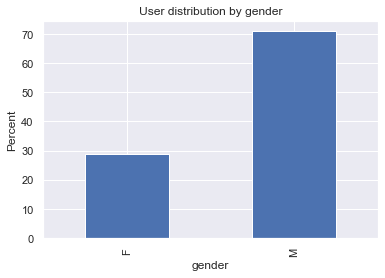

In [16]:
# Percentage of Gender
plt.title('User distribution by gender')
plt.ylabel('Percent')
(user.groupby('gender')['user id'].count()/len(user)*100).plot(kind="bar")
plt.show()

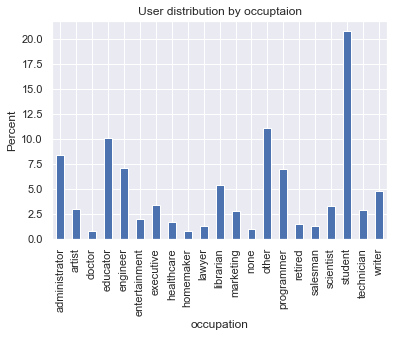

In [17]:
# Percentage of User Occupation 
plt.title('User distribution by occuptaion')
plt.ylabel('Percent')
(user.groupby('occupation')['user id'].count()/len(user)*100).plot(kind="bar")
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [19]:
pop = movie.copy()
# Dropping Movie ID, Movie Title, Release Date columns
pop.drop(['movie id','movie title', 'release date'], axis = 1, inplace = True)
# Set release year as index 
pop.set_index('release year', inplace = True)

In [20]:
# Determining number of genres released in each year 
pop1 = pop.groupby('release year').sum()
# Determining total number of releases in a year
pop1['total'] = pop1.sum(axis = 1)
pop1

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
release year,,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,353
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,381
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,559


In [21]:
# Percentage number of release in a year 
pop1.div(pop1['total'], axis = 0)*100

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
release year,,,,,,,,,,,,,,,,,,,,
1922,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
1926,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
1930,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
1931,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,100.0
1932,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,8.498584,3.682720,1.133144,4.249292,23.229462,2.266289,2.549575,27.478754,0.849858,0.000000,2.266289,0.566572,0.566572,9.915014,1.983003,7.082153,1.983003,1.699717,100.0
1995,0.0,10.498688,5.774278,1.574803,5.511811,16.535433,2.887139,1.312336,23.359580,0.787402,0.262467,3.674541,0.787402,1.312336,9.711286,3.937008,10.236220,1.312336,0.524934,100.0
1996,0.0,7.871199,4.293381,1.610018,3.756708,19.320215,3.756708,3.220036,30.411449,1.073345,0.178891,1.967800,1.610018,1.073345,6.797853,2.683363,8.407871,1.610018,0.357782,100.0


In [53]:
pop2 = pop1.div(pop1['total'], axis = 0)*100
pop2.drop(['total'], axis = 1, inplace = True)

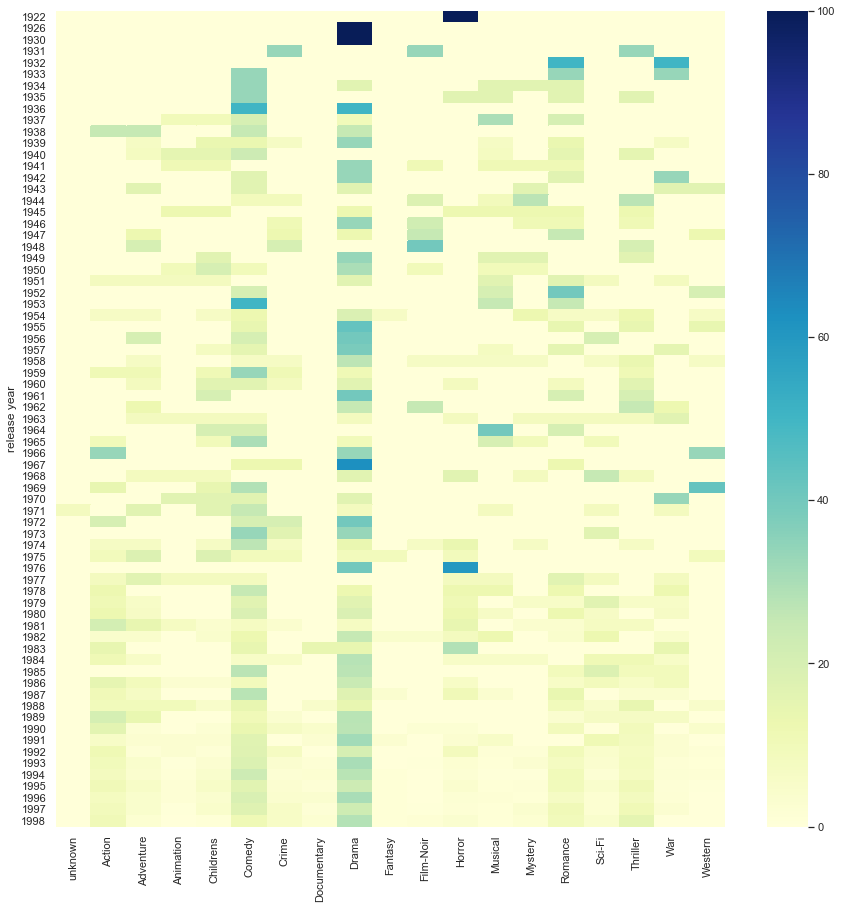

In [56]:
# Heatmap of Percentage number of release in a year by genre
plt.figure(figsize = (15,15))
sns.heatmap(pop2, cmap="YlGnBu")

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [26]:
# Number of ratings for each movie
num_rating = rating.groupby('movie id')['rating'].count()
num_rating

movie id
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: rating, Length: 1682, dtype: int64

In [61]:
# Average ratings for each movie 
avg_rating = rating.groupby('movie id')['rating'].mean()
avg_rating

movie id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating, Length: 1682, dtype: float64

In [63]:
# Determining the top rated 25 movies
top_movies = pd.merge(num_rating, avg_rating, on = 'movie id')
top_movies.columns = ['number', 'average']
# Slice the movies which have ratings more than 100
top100 = top_movies[top_movies['number'] > 100]
# Sort values according to average rating such that movie which highest rating is on top.Select top 25 movies.
top25 = top100.sort_values(by = 'average', ascending = False).head(25)
top25

,number,average
movie id,,
408,112,4.491071
318,298,4.466443
169,118,4.466102
483,243,4.456790
64,283,4.445230
603,209,4.387560
12,267,4.385768
50,583,4.358491
178,125,4.344000


In [64]:
# Tried performing the selection of movies with more than 100 ratings and the top 25 average rated movies in one step
top_movies[top_movies['number'] > 100].sort_values(by = 'average', ascending = False).head(25)

,number,average
movie id,,
408,112,4.491071
318,298,4.466443
169,118,4.466102
483,243,4.456790
64,283,4.445230
603,209,4.387560
12,267,4.385768
50,583,4.358491
178,125,4.344000


In [67]:
# Get movie titles for top 25 rated movies and display only movie id, number, average, movie title columns
pd.merge(top25, movie, on = 'movie id')[['movie id','number','average','movie title']]

,movie id,number,average,movie title
0,408,112,4.491071,"Close Shave, A"
1,318,298,4.466443,Schindler's List
2,169,118,4.466102,"Wrong Trousers, The"
3,483,243,4.456790,Casablanca
4,64,283,4.445230,"Shawshank Redemption, The"
5,603,209,4.387560,Rear Window
6,12,267,4.385768,"Usual Suspects, The"
7,50,583,4.358491,Star Wars
8,178,125,4.344000,12 Angry Men
9,134,198,4.292929,Citizen Kane


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [33]:
# Merging User and Rating files based on user id 
user_rating = pd.merge(rating, user, on = 'user id')

In [34]:
user_rating.sort_values(by = 'user id', inplace = True)

In [35]:
# Merging User, Rating, Movie data based on movie id
user_rating_title = pd.merge(user_rating, movie, on = 'movie id')

In [36]:
user_rating_title.head()

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,61,4,878542420,24,M,technician,85711,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,1994
1,13,61,4,882140552,47,M,educator,29206,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,1994
2,18,61,4,880130803,35,F,other,37212,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,1994
3,58,61,5,884305271,27,M,programmer,52246,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,1994
4,59,61,4,888204597,49,M,educator,08403,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,1994


In [37]:
# Total number of user ratings by gender
user_rating_title.groupby('gender')['rating'].count()

gender
F    25738
M    74253
Name: rating, dtype: int64

In [38]:
# Total number of Drama movies rated by gender
user_rating_title[user_rating_title['Drama'] == 1].groupby('gender')['Drama'].count()

gender
F    11008
M    28887
Name: Drama, dtype: int64

In [39]:
# Women (42.7%) watch more Drama when compared to men (38.9%). Hence the statement "Men watch more drama than women" is invalid 
user_rating_title[user_rating_title['Drama'] == 1].groupby('gender')['Drama'].count() / user_rating_title.groupby('gender')['rating'].count() * 100

gender
F    42.769446
M    38.903479
dtype: float64

In [40]:
# Number of Sci-Fi movies rated by gender
user_rating_title[user_rating_title['Sci-Fi'] == 1].groupby('gender')['Sci-Fi'].count()

gender
F     2629
M    10101
Name: Sci-Fi, dtype: int64

In [41]:
# Women (10.2%) do not watch more Sci-Fi than men (13.6%). Hence the statement "Women watch more Sci-Fi than men" is invalid
user_rating_title[user_rating_title['Sci-Fi'] == 1].groupby('gender')['Sci-Fi'].count() / user_rating_title.groupby('gender')['rating'].count() * 100

gender
F    10.214469
M    13.603491
dtype: float64

In [42]:
# Number of Romance movies rated by gender
user_rating_title[user_rating_title['Romance'] == 1].groupby('gender')['Romance'].count()

gender
F     5858
M    13603
Name: Romance, dtype: int64

In [311]:
# Men (18.3%) do not watch more Romance than women (22.7%). Hence the statement "Men watch more Romance than women" is invalid. 
user_rating_title[user_rating_title['Romance'] == 1].groupby('gender')['Romance'].count() / user_rating_title.groupby('gender')['rating'].count() * 100

gender
F    22.760121
M    18.319799
dtype: float64